# [02] 간단한 분류 알고리즘 훈련

In [56]:
import numpy as np

class Perceptron(object):
    """
    퍼셉트론 분류기
    
    매개변수
    -----------
    
    eta : float
        학습률(0.0 과 1.0 사이)
    n_iter : int
         훈련 데이터셋 반복 횟수
    random_state : int
         가중치 무작위 초귀화를 위한 난수 생성기 시드
      
    속성
    ------------
    w_ : 1d-array
       학습된 가중치
    errors_ : list
        에포크마다 누적된 분류 오류
           (에포크(epoch):훈련데이터셋을 반복할 최대 횟수
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self , X, y):
        """
        훈련데이터 학습
        
        매개변수
        ----------------
        X : {array-like}, shape = [n_samples, n_features]
           n_samples개의 샘플과 n_feratures개의 특성으로 이루어진 훈련 데이터
        y : array-like , shape = [n_samples]
            타깃 값
            
        반환값
        -----------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0]  += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        """입력 계산"""
        return np.dot(X,self.w_[1:]) + self. w_[0]
    
    def predict(self,X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0,1,-1)

이 퍼셉트론 구현을 사용하여 학습률 eta와 에포크 횟수(훈련데이터셋을 반복하는 횟수) n_iter로 새로운 Perceptron 객체를 초기화합니다.

가중치를 0으로 초기화하지 않는 이유는 가중치가 0이 아니어야 학습률이 분류결과에 영향을 주기 때문이다. 가중치가 0으로 초기화되어 있다면 학습률 피라미터 eta는 가중치 벡터의 방향이 아니라 크기에만 영향을 미친다.

In [57]:
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)))

0.0

np.arccos 함수는 역코사인 삼각 함수이고 np.linalg.norm은 벡터 길이를 계산하는 함수이다.
(균등 분포가 아니라 정규 분포를 사용하고 포준 편차 0.01을 선택한 것에는 특별한 이유가 없다. 오직 벡터의 모든 원소가 0이 되는 것을 피하기 위해 랜덤한 작은 값을 얻기만 하면 된다.)

In [58]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
print("URL : ", s)
"""
위의 코딩이랑 같은 표현
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
                   ,header=None, encoding='utf-8')
만약 인터넷 연결되어 있지 않거나 이따금  UCI서버에 접근을 할 수 없을 시 사용, 이때 로컬 디렉터리에서 불꽃 데이터를 로드하려고 하면
df = pd.read_csv('your/local/path/to/iris.data',
                   header=None, encoding='utf-8')
"""

URL :  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


"\n위의 코딩이랑 같은 표현\ndf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'\n                   ,header=None, encoding='utf-8')\n만약 인터넷 연결되어 있지 않거나 이따금  UCI서버에 접근을 할 수 없을 시 사용, 이때 로컬 디렉터리에서 불꽃 데이터를 로드하려고 하면\ndf = pd.read_csv('your/local/path/to/iris.data',\n                   header=None, encoding='utf-8')\n"

In [59]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


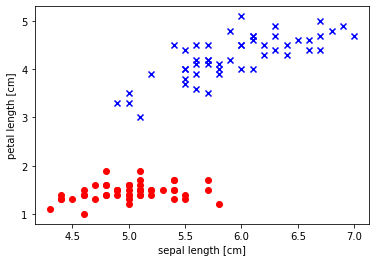

In [60]:
import matplotlib.pyplot as plt
import numpy as np

#setosa와 versicolor를 선택합니다
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100,[0,2]].values

# 산점도를 그립니다
plt.scatter(X[:50,0], X[:50,1],
            color = 'red', marker='o', label= 'setosa')
plt.scatter(X[50:100,0],X[50:100,1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

### 퍼셉트론 모델 훈련하기

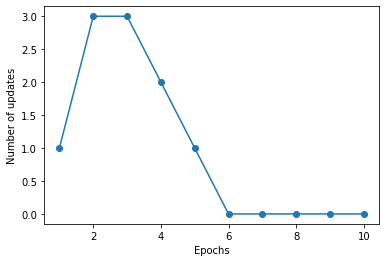

In [61]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### 결정 경계를 시각화

In [76]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    
    #마커와 컬러맵을 설정합니다.
    markers=('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','linegreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계를 그립니다
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #샘플의 산점도를 그립니다.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x= X[y ==cl ,0],
                    y= X[y ==cl,1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor= 'black')

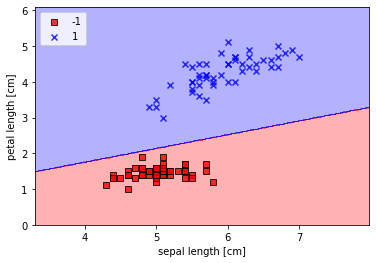

In [77]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()